# MALIGNANT COMMENTS CLASSIFICATION

## Problem Statement :

    Sentiment Analysis is the task of analyzing people’s opinions in textual data (e.g., product reviews, movie reviews, or tweets), and extracting their polarity and viewpoint. The task can be cast as either a binary or a multi-class problem. Binary sentiment analysis classifies texts into positive and negative classes, while multi-class sentiment analysis classifies texts into fine-grained labels or multi-level intensities.

    The goal of this project is to use deep learning techniques to identify the level toxicity of a comment which could be used to help deter users from posting potentially hurtful comments, engage in more sophisticated arguments and make internet a safer place. 

    Our dataset consists of 6 labels namely highly malignant, malignant, abuse, threat, loathe and rude. This project aims to implement various Machine Learning algorithms and deep learning algorithms like Multilayer perceptron(MLP), Long Short Term Memory Networks, Multinomial Naïve Baiyes, Logistic Regression, Random Forest Classifier , Linear SVC and Adaptive Boosting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
# Checking the shape of the train dataset
df_train.shape

(159571, 8)

In [7]:
# Checking the shape of the test dataset
df_test.shape

(153164, 2)

In [8]:
# Checking the number of unique comments
df_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [9]:
# Checking the inormation of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


### Observation:

    1-Information shows that there are no null values present in our dataset.
    2-ID and Comment_text feature is only object datatype and rest all the features are integer datatype. 

In [11]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Checking the missing values in the dataset
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [12]:
# Checking the missing values in the dataset
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [13]:
df_train.drop('id',axis = 1, inplace = True)

AxesSubplot(0.125,0.125;0.62x0.755)


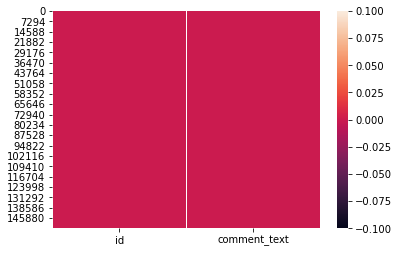

In [14]:
#Visualising null values in train csv

print(sns.heatmap(df_test.isna()))

AxesSubplot(0.125,0.125;0.62x0.755)


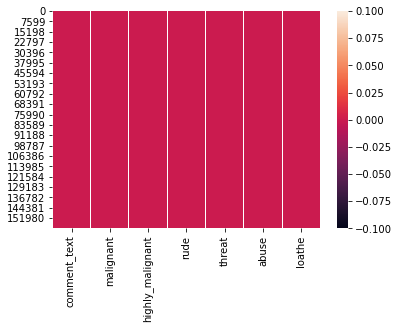

In [15]:
#Visualising null values in train csv

print(sns.heatmap(df_train.isna()))

In [16]:
#splitting the data into two lists according to numerical and categorical features
Numerical_df = []
Categorical_df = []

for i in df_train:
    if ((df_train[i].dtypes=='int64')|(df_train[i].dtypes=='float')):
        Numerical_df.append(i)
    else:
        Categorical_df.append(i)

### Data Analysis

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



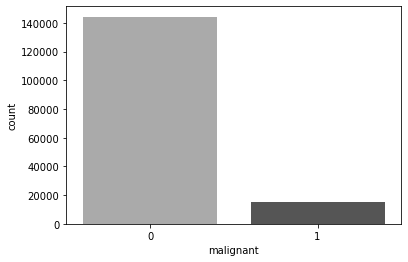

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



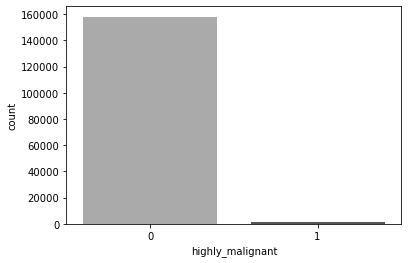

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



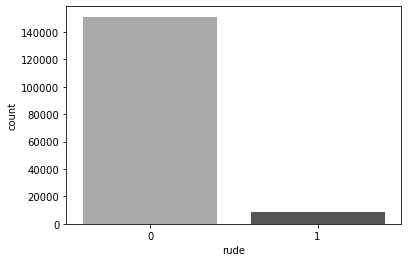

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



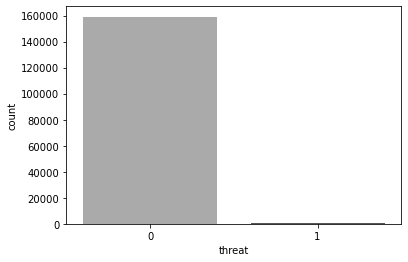

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



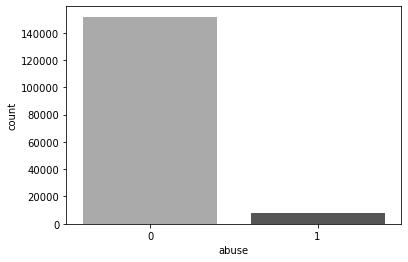

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



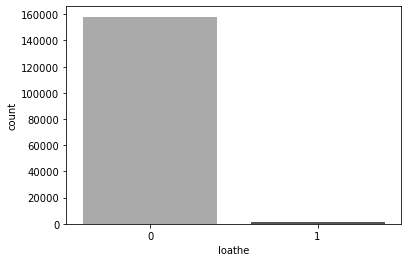

In [17]:
for i in Numerical_df:
    print("Counting of labels for:", i) 
    sns.countplot(df_train[i],palette='binary',saturation=0.95)
    print(df_train[i].value_counts(),'\n')
    plt.show()

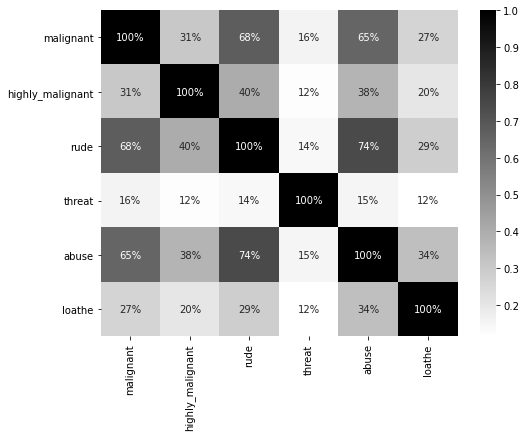

In [18]:
#Seeing the correlation via visualization
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True,fmt='.0%',cmap='binary')
plt.show()

### Data pre processing

In [19]:
#New column for length of comment
df_train['length']=df_train.comment_text.str.len()
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [20]:
#converting all message to lower case
df_train['comment_text']=df_train['comment_text'].str.lower()

In [21]:
#Replace email address with 'email'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')
#Replace URLs with 'webaddress'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')
#Replace money symbol with 'moneysymb'(£ can type with ALT key+156)
df_train['comment_text']=df_train['comment_text'].str.replace(r'£|\$','dollers')
#Replace 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace number with 'numbr'
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\d+(\.\d+)?','numbr')

In [22]:
#Remove punctuation
df_train['comment_text']=df_train['comment_text'].str.replace(r'[^\w\d\s]',' ')
#replace whitespace between terms with a single space
df_train['comment_text']=df_train['comment_text'].str.replace(r'\s+',' ')
#remove leading and trailing whitespace
df_train['comment_text']=df_train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [23]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_train['comment_text']=df_train['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [24]:
df_train['clean_length']=df_train.comment_text.str.len()
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,171
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,83
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29


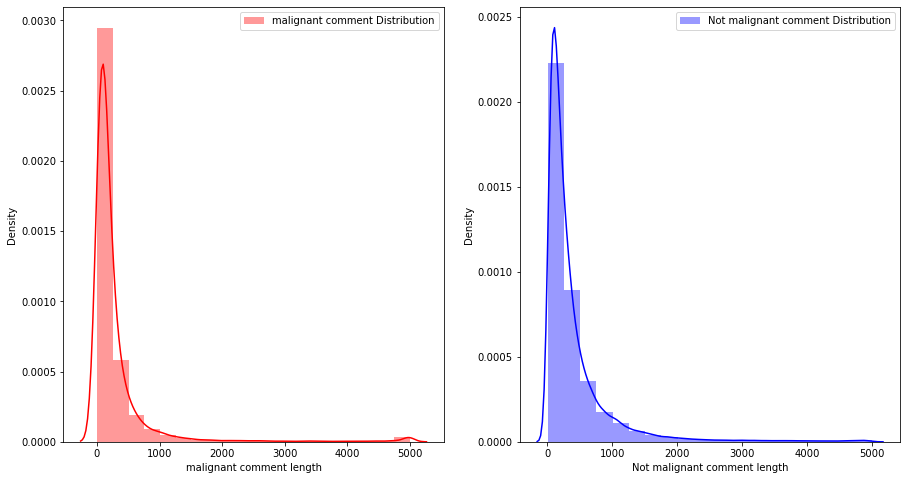

In [30]:
#comment distribution Before cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_train[df_train['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

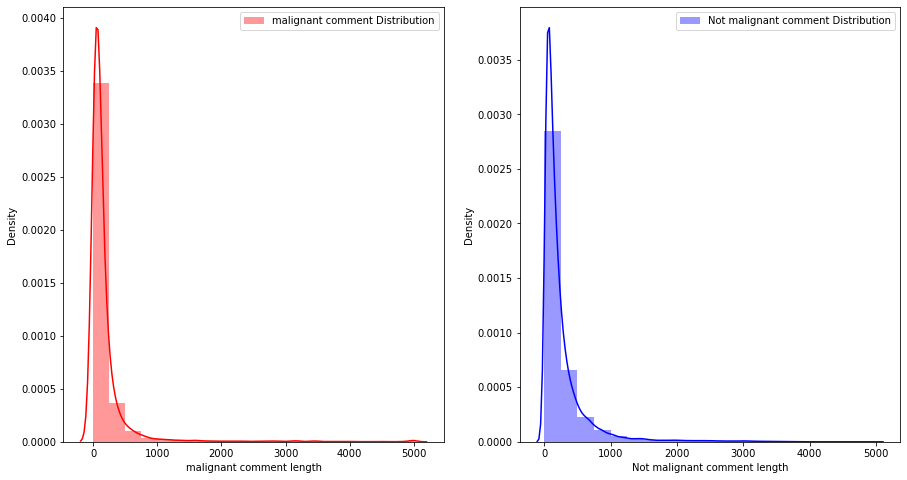

In [31]:
#comment distribution After cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_train[df_train['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='malignant comment Distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()
sns.distplot(df_train[df_train['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='Not malignant comment Distribution',color='b')
ax[1].set_xlabel('Not malignant comment length')
ax[1].legend()
plt.show()

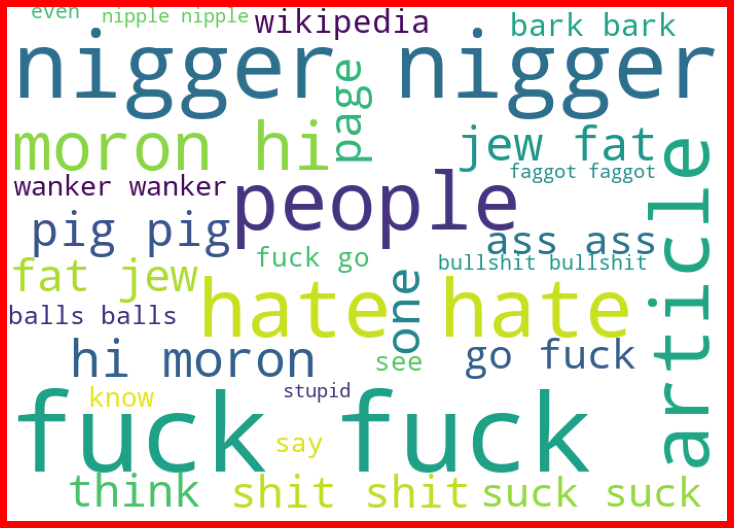

In [27]:
#getting sense of loud word in malignant
from wordcloud import WordCloud

malignant=df_train['comment_text'][df_train['malignant']==1]

malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

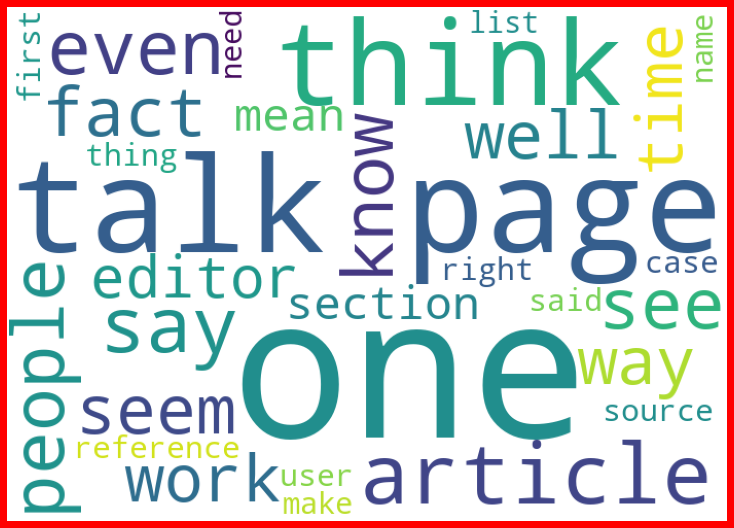

In [28]:
#getting sense of loud word in Not malignant
from wordcloud import WordCloud

not_malignant=df_train['comment_text'][df_train['malignant']==0]

not_malignant_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(not_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

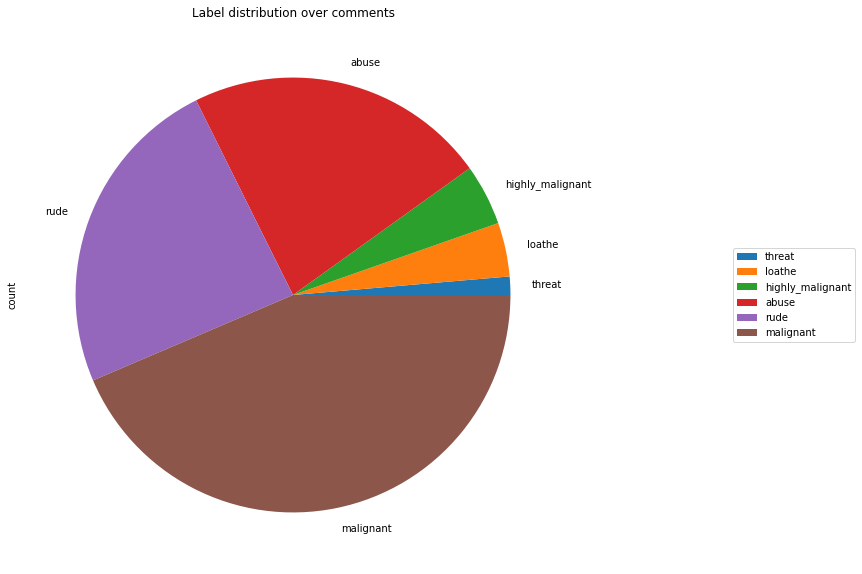

In [33]:
df_distribution =df_train[Numerical_df].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

# Model Building

In [35]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [36]:
# Splitting the training dataset into x and y
x=Tf_idf_train(train['comment_text'])
x.shape

(159571, 43194)

In [37]:
y_test.shape

(159571,)

In [38]:
# Importing libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV


# Importing evaluation metrics for model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30,stratify=y)

In [40]:
# Creating instances for different Classifiers

LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
SV=SVC()

In [41]:
# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))

In [ ]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_Positive_Rate')
    plt.xlabel('False_Positive_Rate')
    print('\n\n')

************** LogisticRegression ***************


LogisticRegression()


Accuracy_score= 0.9531667780748663


Cross_Val_Score= 0.9535128562209592


roc_auc_score= 0.7924918146002661


classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.92      0.59      0.72      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



[[42754   250]
 [ 1992  2876]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************** MultinomialNB ***************


MultinomialNB()


Accuracy_score= 0.9354737633689839


Cross_Val_Score= 0.9367303554748633


roc_auc_score= 0.6884622511658735


classification report
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     43004
           1       0.97      0.38      0.54      4868

    accuracy        

In [42]:
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
pred=LR.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy Score: 0.9531667780748663
Confusion Matrix: [[42754   250]
 [ 1992  2876]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.92      0.59      0.72      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



Text(0.5, 1.0, 'Logistic Regression')

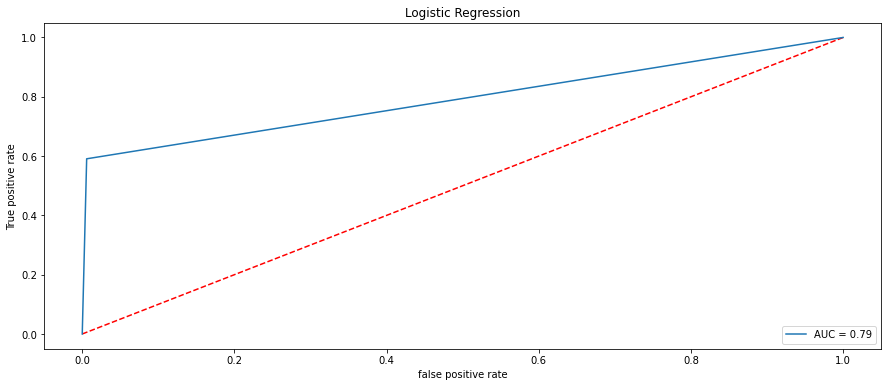

In [43]:
# Roc-Auc score
f,ax = plt.subplots(figsize = (15,6))
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
ax.plot([0,1],[0,1],'r--')
ax.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc_score(y_test, pred))
ax.legend(loc='lower right')
ax.set_xlabel('false positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('Logistic Regression')

# Predicting the Dataset

In [44]:
def Tf_idf_test(text):
    tfid = TfidfVectorizer(max_features=43194,smooth_idf=False)
    return tfid.fit_transform(text)

In [45]:
x_test_data=Tf_idf_test(test['clean_comment_text'])

In [46]:
x_test_data.shape

(153164, 43194)

In [47]:
Prediction=LR.predict(x_test_data)
test['Predicted Labels']=Prediction
test

,id,comment_text,comment_length,clean_comment_text,clean_comment_length,Predicted Labels
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367,bitch rule succesful whats hating mofuckas bit...,184,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50,title fine,10,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54,source zawe ashton lapland,26,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",205,look source information updated correct form g...,109,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,41,anonymously edit article,24,0
...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60,totally agree stuff long crap,29,0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198,throw field home plate faster throwing direct ...,85,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423,okinotorishima category change agree correct g...,212,0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502,founding nation germany return similar israel ...,275,0


In [48]:
test['Predicted Labels'].value_counts()

0    152452
1       712
Name: Predicted Labels, dtype: int64

In [49]:
# Pickle file.
import joblib
joblib.dump(LR,'Malignant_Prediction.pkl')

['Malignant_Prediction.pkl']

In [50]:
test.to_csv('Malignant_Predict.csv')